# Caso práctico bloque 2 

## Problema 1

In the auto.csv file you will find the following data for different cars:

- Cylinders
- Displacement
- Power
- Weight
- Acceleration
- Year of the car
- Origin
- Consumption (mpg)

The units of automobile characteristics are not in the international system. The variable
"Origin" is a code that identifies the country of origin.

Create a model with the dataset so that the consumption of a vehicle can be estimated from the rest of the variables.

---

### Let´s begin

#### <u>Import necessary libraries:</u>

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
notebookPath=os.getcwd()
#print("Notebook path: " + notebookPath)
dataBase=pd.read_csv(notebookPath+'\\Problema 1\\auto.csv',delimiter=',')
dataBase.head()


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [4]:
dataBase.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


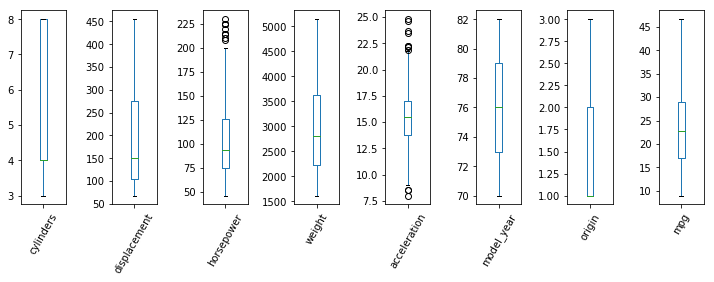

In [5]:
fig=dataBase.plot(subplots=True, layout=(1,8), kind='box',rot=60, figsize=(10, 4))#para eliminar los ticks usamos yticks=[]
plt.tight_layout(pad=1) #para aumentar la separación entre los subplots

We can see that this dataset is pretty clean, without outliers (values that go too far from max and min).

In [6]:
dataBase.shape

(392, 8)

In [7]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
mpg             392 non-null float64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


We can check that, as all columns are numeric, we won't have any "rare" data point.

In [8]:
dataBase.isnull().describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392,392,392,392,392,392,392,392
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,392,392,392,392,392,392,392,392


In [9]:
dataBase.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

As we are realizing, this dataset is very "clean", as we dont have any null or void value. We don´t have to take care about them.

We can check unique values for "cylinders","origin" and "model_year" columns, as we can suppose that are "factors"

In [10]:
print('cylinders unique values: '+ str(dataBase['cylinders'].unique()))
print('origin unique values: '+ str(dataBase['origin'].unique()))
print('model_year unique values: '+ str(dataBase['model_year'].unique()))

cylinders unique values: [8 4 6 3 5]
origin unique values: [1 3 2]
model_year unique values: [70 71 72 73 74 75 76 77 78 79 80 81 82]


#### <u>Type checking and correction:</u>

In [11]:
dataBase.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
mpg             float64
dtype: object

As we see, there is not any column with a wrong data type.

*In case we need to change the type, we can use Dataframe.astype()

#### <u>Conversion to International System units</u>

In this case, we only are going to change the consumption, from mpg (miles per gallon) to l/100km (litres per 100 km)

In [12]:
dataBase['consumption']=235.214583/dataBase['mpg']
dataBase.drop(columns=['mpg'], inplace=True)
dataBase.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,consumption
0,8,307.0,130.0,3504.0,12.0,70,1,13.067477
1,8,350.0,165.0,3693.0,11.5,70,1,15.680972
2,8,318.0,150.0,3436.0,11.0,70,1,13.067477
3,8,304.0,150.0,3433.0,12.0,70,1,14.700911
4,8,302.0,140.0,3449.0,10.5,70,1,13.836152


#### <u>Consumption plotting again other variables</u>

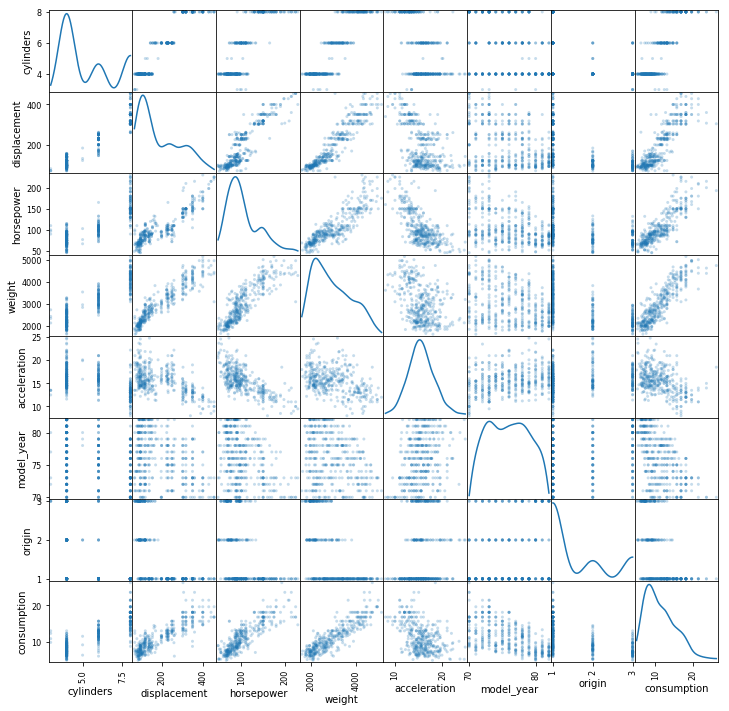

In [13]:
fig=pd.plotting.scatter_matrix(dataBase,figsize=(12,12),alpha=0.25,diagonal='kde')

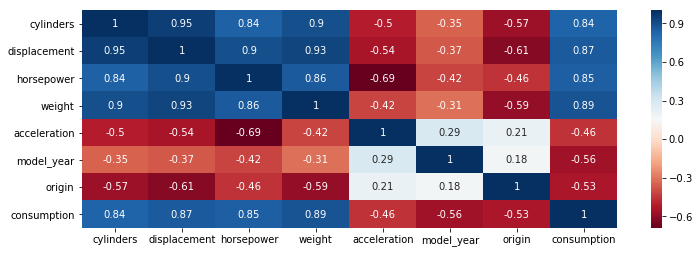

In [14]:
plt.figure(figsize=(12,4))
corrDataBase=dataBase.corr()
fig=sns.heatmap(corrDataBase,cmap='RdBu',annot=True)

As we can see in the scatter matrix and in the heatmap, <u> consumption </u> will be closely related to:

- cylinders
- displacement
- horsepower
- weight

and to a lesser extent, with the remaining variables.

#### <u>Regression model construction:</u>

We should divide the data set into two parts:

- Training set (train)
- Validation set (test)

In [15]:
from sklearn.model_selection import train_test_split #importamos la función que nos permite dividir el dataset aleatoriamente.

y='consumption' #variable que queremos explicar en base a las demás

x_dataBase=dataBase.drop(columns=y)
y_dataBase=pd.DataFrame(dataBase[y])

x_train, x_test, y_train, y_test = train_test_split(x_dataBase, y_dataBase, test_size=0.25) #dividimos el dataset en dos conjuntos, entrenamiento y validación.



# dividimos x e y del conjunto de entrenamiento
#y_train=pd.DataFrame(train[x])
#x_train=train.drop(columns=x)

# dividimos x e y del conjunto de validación
#y_test=pd.DataFrame(test[x])
#x_test=test.drop(columns=x)

print('x_train set shape: '+str(x_train.shape)+'\ny_train set shape: '+ str(y_train.shape))
print('x_test set shape: '+str(x_test.shape)+'\ny_test set shape: '+ str(y_test.shape))


x_train set shape: (294, 7)
y_train set shape: (294, 1)
x_test set shape: (98, 7)
y_test set shape: (98, 1)


We can now check our new datasets:

In [16]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
209,6,168.0,120.0,3820.0,16.7,76,2
233,4,97.0,75.0,2265.0,18.2,77,3
5,8,429.0,198.0,4341.0,10.0,70,1
251,6,200.0,95.0,3155.0,18.2,78,1


In [17]:
y_train.head()

,consumption
0,13.067477
209,14.255429
233,9.046715
5,15.680972
251,11.473882


In [18]:
x_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
113,4,98.0,90.0,2265.0,15.5,73,2
259,6,258.0,120.0,3410.0,15.1,78,1
121,4,121.0,110.0,2660.0,14.0,73,2
143,4,83.0,61.0,2003.0,19.0,74,3
262,8,302.0,139.0,3205.0,11.2,78,1


In [19]:
y_test.head()

,consumption
113,9.046715
259,12.995281
121,9.800608
143,7.350456
262,12.995281


We can build a multiple regression model, for what we should use <u>LinearRegression</u> from scikit-learn package:

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [21]:
model = LinearRegression()
model.fit(x_train,y_train)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

# Evaluación de R2
print('R\u00b2 (training) is: ', model.score(x_train, y_train))
print('R\u00b2 (test) is: ', model.score(x_test, y_test))

R² (training) is:  0.8801089974571746
R² (test) is:  0.8954393161747158


We see that the R <sup> 2 </sup> are very similar between the predictions made in training and validation, so it seems that we do not have <u> overfitting </u>.

Also, both are close to 1, so we can say that our model works well predicting consumption.

We check the coefficients for all variables, calculated by the algorithm:

In [22]:
print('coeficientes: '+ str(model.coef_))

coeficientes: [[ 0.27460118 -0.00401832  0.02197633  0.00266028  0.03518049 -0.30054861
  -0.21780012]]


In [23]:
print('intersección (intercept): '+ str(model.intercept_))

intersección (intercept): [22.95134443]


So, the equation for our model will be:

In [24]:
eq=list()

for i in range(0,len(x_dataBase.columns)):
    eq.append('('+str(str(round(model.coef_[0,i],3))+')'+'*'+x_dataBase.columns[i]))
eq.append(round(model.intercept_[0],3))

eq=[str(i) for i in eq]
eqString="+".join(eq)

print('\u001b[4mModel equation:\u001b[0m\n\n'+'\u001b[1m'+  eqString)

Model equation:

(0.275)*cylinders+(-0.004)*displacement+(0.022)*horsepower+(0.003)*weight+(0.035)*acceleration+(-0.301)*model_year+(-0.218)*origin+22.951


In [25]:
predictDataFrame_train=x_train.join(y_train)
predictDataFrame_train['prediction']=predict_train
predictDataFrame_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,consumption,prediction
0,8,307.0,130.0,3504.0,12.0,70,1,13.067477,15.259030
209,6,168.0,120.0,3820.0,16.7,76,2,14.255429,14.033516
233,4,97.0,75.0,2265.0,18.2,77,3,9.046715,8.178369
5,8,429.0,198.0,4341.0,10.0,70,1,15.680972,18.419477
251,6,200.0,95.0,3155.0,18.2,78,1,11.473882,11.255910


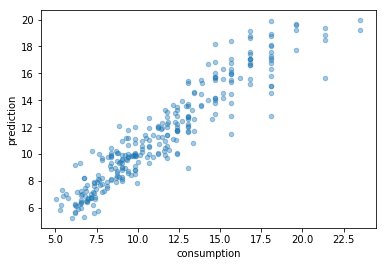

In [26]:
fig=predictDataFrame_train.plot(x='consumption',y='prediction',kind='scatter',alpha=0.4)

In [27]:
predictDataFrame_test=x_test.join(y_test)
predictDataFrame_test['prediction']=predict_test
predictDataFrame_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,consumption,prediction
113,4,98.0,90.0,2265.0,15.5,73,2,9.046715,9.829002
259,6,258.0,120.0,3410.0,15.1,78,1,12.995281,12.141567
121,4,121.0,110.0,2660.0,14.0,73,2,9.800608,11.174147
143,4,83.0,61.0,2003.0,19.0,74,3,7.350456,8.159754
262,8,302.0,139.0,3205.0,11.2,78,1,12.995281,12.248952


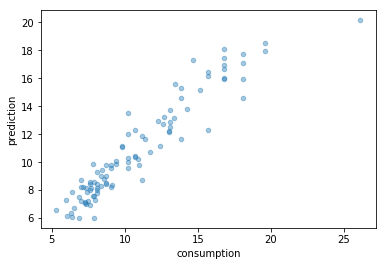

In [28]:
fig=predictDataFrame_test.plot(x='consumption',y='prediction',kind='scatter',alpha=0.4)